https://picturemushroom.com/region/United-States-North-Carolina.html

In [1]:
import os
import tensorflow as tf

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print("TensorFlow version:", tf.__version__)
print("Available GPU :", tf.config.list_physical_devices('GPU'))
print("Is Built with CUDA:", tf.test.is_built_with_cuda())

2023-11-25 00:46:27.002940: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 00:46:27.029486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 00:46:27.029522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 00:46:27.029539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 00:46:27.035717: I tensorflow/core/platform/cpu_feature_g

TensorFlow version: 2.14.1
Available GPU : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is Built with CUDA: True


2023-11-25 00:46:28.550765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.555480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.555698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/val",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1988 files belonging to 20 classes.


2023-11-25 00:46:28.730863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.731289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.731602: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.943585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 00:46:28.943876: I tensorflow/compile

Found 373 files belonging to 20 classes.
Found 137 files belonging to 20 classes.


Classes found: ['10526_Armillaria_mellea', '11803_Clitocybe_rivulosa', '12763_Hericium_cirrhatum', '14158_Ganoderma_applanatum', '14159_Ganoderma_lucidum', '15527_Inonotus_obliquus', '15823_Lactarius_chrysorrheus', '20983_Trametes_versicolor', '44101_Lactarius_necator', '63482_Clitocybe_nebularis', 'edible-Boletus_edulis', 'edible-Cantharellus_cibarius', 'edible-Flammulina_velutipes', 'edible-Grifola_frondosa', 'edible-Hericium_erinaceus', 'edible-Lactarius_deliciosus', 'edible-Laetiporus_sulphureus', 'edible-Leccinum_scabrum', 'edible-Morchella_esculenta', 'edible-Pleurotus_ostreatus']
Number of classes: 20


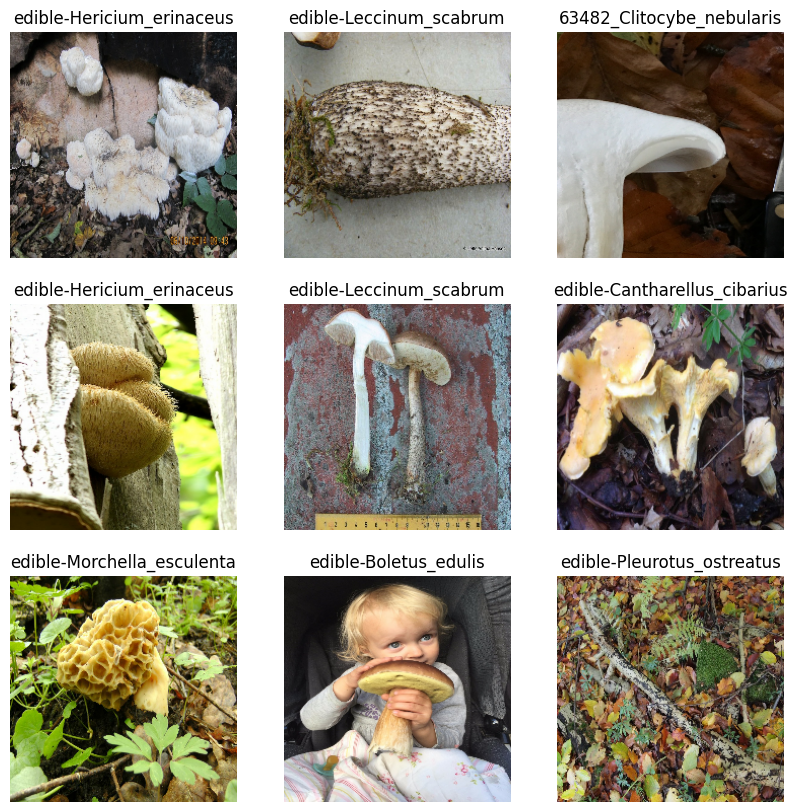

In [3]:
import matplotlib.pyplot as plt

classes = os.listdir('dataset/train')
classes.sort()
num_classes = len(classes)

print("Classes found:", classes)
print("Number of classes:", num_classes)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

plt.show()

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    # tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

2023-11-25 00:46:31.259367: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


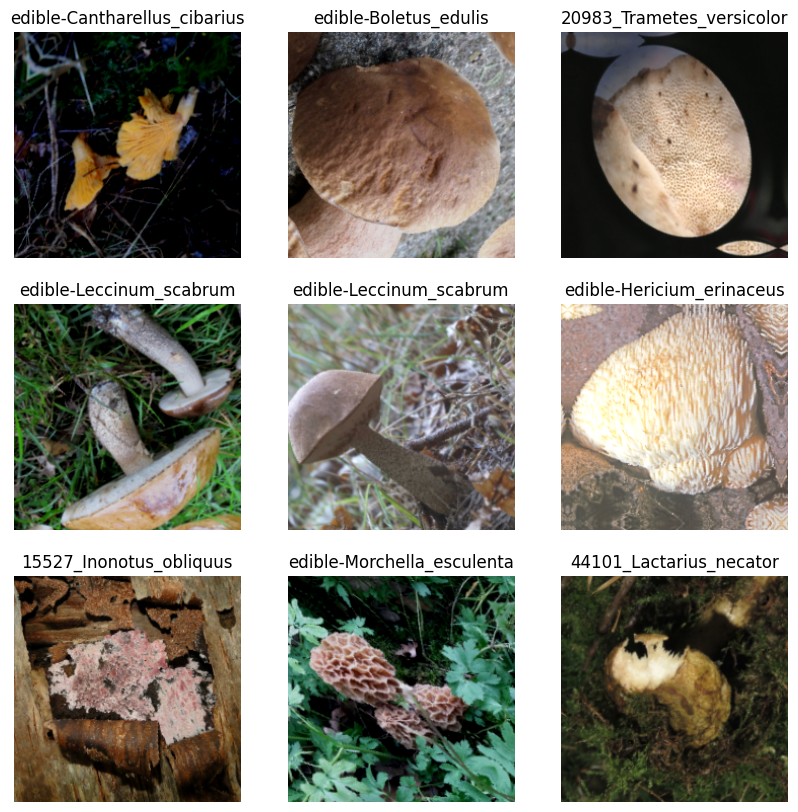

In [6]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Positioning in the second row
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

plt.show()

In [7]:
# preprocess_input_mobilenet_v2 = tf.keras.applications.mobilenet_v2.preprocess_input

# base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
#                                                 include_top=False,
#                                                 weights='imagenet')

    
# base_model.trainable = False

# image_batch, label_batch = next(iter(train_ds))
# feature_batch = base_model(image_batch)

# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
# prediction_batch = prediction_layer(feature_batch_average)
# batch_norm_layer = tf.keras.layers.BatchNormalization()  # Batch Normalization layer

# inputs = tf.keras.Input(shape=(img_height, img_width, 3))
# x = data_augmentation(inputs)
# x = preprocess_input_mobilenet_v2(x)
# x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = batch_norm_layer(x)  # Apply Batch Normalization
# outputs = prediction_layer(x)

# model = tf.keras.Model(inputs, outputs)

2023-11-25 00:46:33.520444: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-11-25 00:46:33.545038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-25 00:46:33.636674: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [ ]:
# Use the correct preprocessing for MobileNetV3
preprocess_input_mobilenet_v3 = tf.keras.applications.mobilenet_v3.preprocess_input

# Replace MobileNetV2 with MobileNetV3Large
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(img_height, img_width, 3),
                                                    include_top=False,
                                                    weights='imagenet')

base_model.trainable = False

# Rest of your code remains mostly unchanged
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
prediction_layer = tf.keras.layers.Dense(num_classes, kernel_regularizer=tf.keras.regularizers.l2(0.001))
prediction_batch = prediction_layer(feature_batch_average)
batch_norm_layer = tf.keras.layers.BatchNormalization()

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input_mobilenet_v3(x)  # Use MobileNetV3 preprocessing
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = batch_norm_layer(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

In [9]:
epoch = 50

weight_name = 'weight/mobilenetv3_fungus' + str(num_classes) + '_epoch' + str(epoch)

easrly_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

best_model = tf.keras.callbacks.ModelCheckpoint(
    weight_name + '_best.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=0
)

tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=weight_name + '_logs',
    histogram_freq=0
)

In [10]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch,
    callbacks=[easrly_stopping, best_model, tensorboard]
)

Epoch 1/50


/home/samxu/projects/apply_ai/final_fungus-detector/.venv/lib/python3.10/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-11-25 00:47:10.812885: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5606cb0711d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-25 00:47:10.812920: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-11-25 00:47:10.816693: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-25 00:47:10.875616: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line 

63/63 [==============================] - ETA: 0s - loss: 2.5292 - accuracy: 0.2988

/home/samxu/projects/apply_ai/final_fungus-detector/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 6s 45ms/step - loss: 2.5292 - accuracy: 0.2988 - val_loss: 4.2734 - val_accuracy: 0.0214
Epoch 2/50
63/63 [==============================] - 2s 29ms/step - loss: 1.5221 - accuracy: 0.5488 - val_loss: 4.8805 - val_accuracy: 0.0161
Epoch 3/50
63/63 [==============================] - 2s 26ms/step - loss: 1.2950 - accuracy: 0.6313 - val_loss: 5.4009 - val_accuracy: 0.0134
Epoch 4/50
63/63 [==============================] - 2s 26ms/step - loss: 1.0948 - accuracy: 0.6720 - val_loss: 5.8555 - val_accuracy: 0.0107
Epoch 5/50
63/63 [==============================] - 2s 26ms/step - loss: 1.0350 - accuracy: 0.6916 - val_loss: 6.2049 - val_accuracy: 0.0188
Epoch 6/50
43/63 [===================>..........] - ETA: 0s - loss: 0.9332 - accuracy: 0.7158

KeyboardInterrupt: 

In [ ]:
model.save(weight_name + '_final')
model.evaluate(test_ds)

In [ ]:
import numpy as np

plt.figure(figsize=(10, 20))

for images, labels in test_ds.take(1):
    classifications = model(images)

    for i in range(5):
        ax = plt.subplot(5, 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        index = np.argmax(classifications[i])
        probabilities = tf.nn.softmax(classifications[i]).numpy()
        confidence = np.max(probabilities) * 100
        
        plt.title(f"Pred: {classes[index]} ({confidence:.2f}% confidence) | Real: {classes[labels[i]]}")


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(weight_name + ".tflite", 'wb') as f:
  f.write(tflite_model)